In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt


In [74]:
df = pd.read_csv('weather_prediction_dataset.csv')

In [75]:
df = df.iloc[:, :11]
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    3654 non-null   int64  
 1   MONTH                   3654 non-null   int64  
 2   BASEL_cloud_cover       3654 non-null   int64  
 3   BASEL_humidity          3654 non-null   float64
 4   BASEL_pressure          3654 non-null   float64
 5   BASEL_global_radiation  3654 non-null   float64
 6   BASEL_precipitation     3654 non-null   float64
 7   BASEL_sunshine          3654 non-null   float64
 8   BASEL_temp_mean         3654 non-null   float64
 9   BASEL_temp_min          3654 non-null   float64
 10  BASEL_temp_max          3654 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 314.1 KB


In [77]:
df = df.drop(['DATE', 'MONTH'], axis = 1)
df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


# Добавление новой колонки

In [78]:
df['Humidity_to_Pressure'] = df['BASEL_humidity'] / df['BASEL_pressure']
df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,Humidity_to_Pressure
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,0.865254
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,0.843187
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,0.785340
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,0.769830
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,0.878392


# Исключение из датасета значений с околонулевой дисперсией

In [79]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

min_variance_threshold = 0.1 
selector = VarianceThreshold(threshold=min_variance_threshold)
df_selected = selector.fit_transform(df)
df_selected

array([[ 8.  ,  0.2 ,  0.03, ...,  2.9 ,  1.6 ,  3.9 ],
       [ 8.  ,  0.25,  0.  , ...,  3.6 ,  2.7 ,  4.8 ],
       [ 5.  ,  0.5 ,  0.  , ...,  2.2 ,  0.1 ,  4.8 ],
       ...,
       [ 8.  ,  0.07,  1.54, ...,  8.5 ,  7.5 , 11.5 ],
       [ 7.  ,  0.17,  0.57, ...,  6.6 ,  4.3 ,  7.9 ],
       [ 8.  ,  0.08,  0.56, ...,  2.9 , -0.2 ,  4.8 ]])

In [80]:
df = pd.DataFrame(df_selected)

df.head()

,0,1,2,3,4,5,6
0,8.0,0.20,0.03,0.0,2.9,1.6,3.9
1,8.0,0.25,0.00,0.0,3.6,2.7,4.8
2,5.0,0.50,0.00,3.7,2.2,0.1,4.8
3,7.0,0.63,0.35,6.9,3.9,0.5,7.5
4,5.0,0.51,0.07,3.7,6.0,3.8,8.6


# Визуализация корреляции


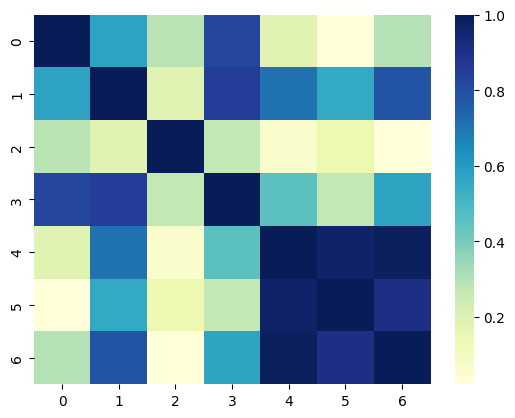

In [81]:
cor_matrix = df.corr().abs()
dataplot = sns.heatmap(cor_matrix,cmap = 'YlGnBu')
plt.show()

# Нормолизация данных и обучение модели

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

df_new = pd.read_csv('weather_prediction_dataset.csv')

X = df_new.drop(columns=["BASEL_cloud_cover"])
Y = df_new["BASEL_cloud_cover"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logreg_clf = LogisticRegression(solver="liblinear")

logreg_clf.fit(X_train, y_train)

y_pred_raw = logreg_clf.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

logreg_clf_normalized = LogisticRegression(solver="liblinear")

logreg_clf_normalized.fit(X_train_normalized, y_train)

y_pred_normalized = logreg_clf_normalized.predict(X_test_normalized)

accuracy_normalized = accuracy_score(y_test, y_pred_normalized)

# X = df.drop(0, axis=1)
# Y = df[0]

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# logreg_clf = LogisticRegression(solver="liblinear")

# logreg_clf.fit(X_train, y_train)

# y_pred_raw = logreg_clf.predict(X_test)

# accuracy_claer_df = accuracy_score(y_test, y_pred_raw)



print(accuracy_raw)
print(accuracy_normalized)
# print(accuracy_claer_df)

0.2503419972640219
0.42544459644322846
